# Capstone Regression Project

## Business Understanding

## Data Understanding

-describes source of dataset
-what each record represents
-which column is begin used as the regress

## Data Preparation

### Loading the Data

In [349]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [350]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [352]:
df.drop(labels='id', axis=1, inplace=True)

In [353]:
df['date'] = pd.to_datetime(df['date'])

In [354]:
df['address'][1000][-20:-15]

'98019'

In [355]:
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
df['address'][0].split(',')[2][-5:]

'98055'

In [356]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [357]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

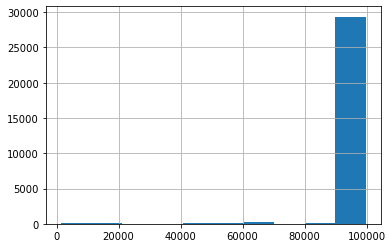

In [358]:
df['Zipcode'].hist()

In [359]:
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98288)]

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29208 non-null  datetime64[ns]
 1   price          29208 non-null  float64       
 2   bedrooms       29208 non-null  int64         
 3   bathrooms      29208 non-null  float64       
 4   sqft_living    29208 non-null  int64         
 5   sqft_lot       29208 non-null  int64         
 6   floors         29208 non-null  float64       
 7   waterfront     29208 non-null  object        
 8   greenbelt      29208 non-null  object        
 9   nuisance       29208 non-null  object        
 10  view           29208 non-null  object        
 11  condition      29208 non-null  object        
 12  grade          29208 non-null  object        
 13  heat_source    29179 non-null  object        
 14  sewer_system   29195 non-null  object        
 15  sqft_above     2920

In [361]:
df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
df_zip.head()

,Neighborhood,Population
ZIP Code,,
98001,Auburn,31911.0
98002,Auburn,31647.0
98003,Federal Way,44151.0
98004,Bellevue,27946.0
98005,Bellevue,17714.0


In [362]:
df_zip.index.names = ['Zipcode']

In [363]:
df_zip.head()

,Neighborhood,Population
Zipcode,,
98001,Auburn,31911.0
98002,Auburn,31647.0
98003,Federal Way,44151.0
98004,Bellevue,27946.0
98005,Bellevue,17714.0


In [364]:
df_zip.reset_index(inplace=True)

In [365]:
df_zip.head()

,Zipcode,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0


<AxesSubplot:>

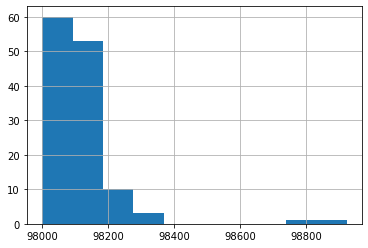

In [366]:
df_zip['Zipcode'].hist()

In [367]:
df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [368]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 127
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zipcode       124 non-null    int64  
 1   Neighborhood  124 non-null    object 
 2   Population    82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [369]:
df_zip.nunique()

Zipcode         124
Neighborhood     34
Population       81
dtype: int64

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29208 non-null  datetime64[ns]
 1   price          29208 non-null  float64       
 2   bedrooms       29208 non-null  int64         
 3   bathrooms      29208 non-null  float64       
 4   sqft_living    29208 non-null  int64         
 5   sqft_lot       29208 non-null  int64         
 6   floors         29208 non-null  float64       
 7   waterfront     29208 non-null  object        
 8   greenbelt      29208 non-null  object        
 9   nuisance       29208 non-null  object        
 10  view           29208 non-null  object        
 11  condition      29208 non-null  object        
 12  grade          29208 non-null  object        
 13  heat_source    29179 non-null  object        
 14  sewer_system   29195 non-null  object        
 15  sqft_above     2920

In [371]:
df['Zipcode'].nunique()

81

In [372]:
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

In [373]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode
count,2.920800e+04,29208.000000,29208.000000,29208.000000,2.920800e+04,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000
mean,1.113195e+06,3.435497,2.332221,2131.250342,1.720087e+04,1.516947,1826.203437,480.945974,336.247364,216.391742,1973.852267,93.870241,47.543569,-122.214082,98077.348740
std,8.956666e+05,0.978918,0.896185,977.621843,6.129149e+04,0.548426,881.013444,586.026595,286.269126,246.817642,31.688131,422.843882,0.146367,0.143646,54.326649
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431060,-122.328355,98032.000000
50%,8.689000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557997,-122.233798,98059.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078075e+04,2.000000,2290.000000,960.000000,510.250000,310.000000,2001.000000,0.000000,47.672063,-122.127324,98117.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98288.000000


### Data Cleaning

In [374]:
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29208 non-null  datetime64[ns]
 1   price          29208 non-null  float64       
 2   bedrooms       29208 non-null  int64         
 3   bathrooms      29208 non-null  float64       
 4   sqft_living    29208 non-null  int64         
 5   sqft_lot       29208 non-null  int64         
 6   floors         29208 non-null  float64       
 7   waterfront     29208 non-null  object        
 8   greenbelt      29208 non-null  object        
 9   nuisance       29208 non-null  object        
 10  view           29208 non-null  object        
 11  condition      29208 non-null  object        
 12  grade          29208 non-null  object        
 13  heat_source    29179 non-null  object        
 14  sewer_system   29195 non-null  object        
 15  sqft_above     2920

In [333]:
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000993
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [334]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [335]:
df_zip.isna().sum()/df.shape[0]

Zipcode         0.00000
Neighborhood    0.00000
Population      0.00144
dtype: float64

In [336]:
df_zip.dropna(subset=['Population'], axis=0, inplace=True)

## Join on zipcode to include neighborhood

In [337]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

In [338]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29168 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29168 non-null  datetime64[ns]
 1   price          29168 non-null  float64       
 2   bedrooms       29168 non-null  int64         
 3   bathrooms      29168 non-null  float64       
 4   sqft_living    29168 non-null  int64         
 5   sqft_lot       29168 non-null  int64         
 6   floors         29168 non-null  float64       
 7   waterfront     29168 non-null  object        
 8   greenbelt      29168 non-null  object        
 9   nuisance       29168 non-null  object        
 10  view           29168 non-null  object        
 11  condition      29168 non-null  object        
 12  grade          29168 non-null  object        
 13  heat_source    29168 non-null  object        
 14  sewer_system   29168 non-null  object        
 15  sqft_above     2916

In [339]:
df1.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000000
sewer_system     0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
Neighborhood     0.000549
Population       0.000549
dtype: float64

In [340]:
df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [341]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29152 entries, 0 to 29167
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29152 non-null  datetime64[ns]
 1   price          29152 non-null  float64       
 2   bedrooms       29152 non-null  int64         
 3   bathrooms      29152 non-null  float64       
 4   sqft_living    29152 non-null  int64         
 5   sqft_lot       29152 non-null  int64         
 6   floors         29152 non-null  float64       
 7   waterfront     29152 non-null  object        
 8   greenbelt      29152 non-null  object        
 9   nuisance       29152 non-null  object        
 10  view           29152 non-null  object        
 11  condition      29152 non-null  object        
 12  grade          29152 non-null  object        
 13  heat_source    29152 non-null  object        
 14  sewer_system   29152 non-null  object        
 15  sqft_above     2915

In [342]:
df1.isna().sum()/df1.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
Neighborhood     0.0
Population       0.0
dtype: float64

In [345]:
df['condition'].value_counts()

Average      17588
Good          8041
Very Good     3255
Fair           223
Poor            61
Name: condition, dtype: int64

## Protected status

In [348]:
df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES')] = 'protected'
df1['grade'].value_counts()

7 Average        11526
8 Good            8832
9 Better          3581
6 Low Average     2845
10 Very Good      1342
11 Excellent       402
5 Fair             385
12 Luxury          120
4 Low               46
protected           39
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [304]:
df1['condition'].value_counts()

Average      17547
Good          8031
Very Good     3251
Fair           223
Poor            61
protected       39
Name: condition, dtype: int64

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean feature engineer.  
3. see coefficients becoming more accurate.


## Target distribution

In [155]:
df1.corr()['price']

price            1.000000
bedrooms         0.290832
bathrooms        0.488047
sqft_living      0.616651
sqft_lot         0.086778
floors           0.199824
sqft_above       0.546001
sqft_basement    0.246354
sqft_garage      0.267526
sqft_patio       0.317651
yr_built         0.106133
yr_renovated     0.085455
lat              0.297267
long             0.081310
Zipcode         -0.104735
yr_old          -0.138185
Population      -0.112760
Name: price, dtype: float64

## Modeling 1:08

In [156]:
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'Neighborhood']]
cats2 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood']]

### Baseline Model

In [157]:
pred_cols = [x for x in df1.columns if x not in cats2]

In [158]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old',
 'Population']

In [159]:
# create baseline model
preds = df1[pred_cols]
target = df1['price']

In [160]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     1835.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:50:07   Log-Likelihood:            -4.3121e+05
No. Observations:               29152   AIC:                         8.625e+05
Df Residuals:                   29136   BIC:                         8.626e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.987e+07   4.34e+06    -23.027      0.000   -1.08e+08   -9.14e+07
bedrooms      -1.353e+05   5210.116    -25.963      0.000   -1.45e+05   -1.25e+05
bathrooms      1.169e+05   7694.103     15.192      0.000    1.02e+05    1.32e+05
sqft_living     327.8250     17.234     19.022      0.000     294.045     361.605
sqft_lot          0.1725      0.064      2.679      0.007       0.046       0.299
floors        -9.946e+04   9795.916    -10.153      0.000   -1.19e+05   -8.03e+04
sqft_above      291.6418     17.604     16.566      0.000     257.136     326.147
sqft_basement    78.0364     13.088      5.962      0.000      52.383     103.689
sqft_garage     -18.9775     18.425     -1.030      0.303     -55.091      17.136
sqft_patio      256.9423     17.059     15.062      0.000     223.505     290.379
yr_built       2762.9371    726.631      3.802      0.000    1338.707    4187.167
yr_renovated    202.0029     22.977      8.792      0.000     156.967     247.039
lat            1.561e+06   2.72e+04     57.293      0.000    1.51e+06    1.61e+06
long           -1.65e+05    3.2e+04     -5.150      0.000   -2.28e+05   -1.02e+05
yr_old         4843.0431    730.618      6.629      0.000    3410.999    6275.088
Population       -2.5538      0.351     -7.275      0.000      -3.242      -1.866
==============================================================================
Omnibus:                    45295.463   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78707746.853
Skew:                           9.421   Prob(JB):                         0.00
Kurtosis:                     256.856   Cond. No.                     7.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Bathrooms` is the most highly correlated feature in the baseline numeric model.  Bedrooms is strangely inversely correlated to price.  All coefficients except `sqft_garage` are statistically significant.  This model uses both discrete and continuous numeric predictors in the baseline.  

In [97]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


338483.67949278234

The Mean Absolute Error('MAE') indicates that we are about $338,484 off in our prediction of `price`.   EXPLAIN.  

## improve upon the baseline

### Dealing with categorical variables\

In [98]:
cat_cols = cats.columns

In [99]:
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [100]:
dum_df1.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'Zipcode',
       'yr_old', 'Population', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'Neighborhood_Baring',
       'Neighborhood_

### Model Iteration

In [49]:
# running our model with dummified predictors
X=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X))
results1 = model_1.fit()
results1.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     715.1
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:40:12   Log-Likelihood:            -4.2592e+05
No. Observations:               29152   AIC:                         8.520e+05
Df Residuals:                   29078   BIC:                         8.526e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             2.18e+06   1.23e+06      1.768      0.077   -2.37e+05     4.6e+06
bedrooms                        -4.314e+04   4583.533     -9.412      0.000   -5.21e+04   -3.42e+04
bathrooms                        7.259e+04   6571.011     11.048      0.000    5.97e+04    8.55e+04
sqft_living                        56.6908     14.864      3.814      0.000      27.557      85.824
sqft_lot                            0.4531      0.057      7.920      0.000       0.341       0.565
floors                          -5889.5193   8677.073     -0.679      0.497   -2.29e+04    1.11e+04
sqft_above                        258.4519     15.171     17.036      0.000     228.717     288.187
sqft_basement                     134.1393     11.305     11.866      0.000     111.981     156.297
sqft_garage                      -135.3532     16.141     -8.386      0.000    -166.990    -103.716
sqft_patio                         63.6562     14.750      4.316      0.000      34.745      92.568
yr_built                         -891.9321    609.955     -1.462      0.144   -2087.472     303.608
yr_renovated                       62.4377     19.340      3.228      0.001      24.529     100.346
yr_old                            672.1360    617.148      1.089      0.276    -537.502    1881.774
Population                          1.2357      0.397      3.111      0.002       0.457       2.014
waterfront_YES                   7.541e+05   2.92e+04     25.868      0.000    6.97e+05    8.11e+05
greenbelt_YES                   -6.472e+04   2.03e+04     -3.185      0.001   -1.05e+05   -2.49e+04
nuisance_YES                    -2.335e+04   8589.248     -2.718      0.007   -4.02e+04   -6511.928
view_EXCELLENT                   6.411e+05   2.95e+04     21.760      0.000    5.83e+05    6.99e+05
view_FAIR                        1.143e+05   3.88e+04      2.946      0.003    3.82e+04     1.9e+05
view_GOOD                        4.721e+04   2.22e+04      2.128      0.033    3731.663    9.07e+04
view_NONE                       -7.684e+04   1.34e+04     -5.727      0.000   -1.03e+05   -5.05e+04
condition_Fair                  -1.191e+05   3.68e+04     -3.240      0.001   -1.91e+05   -4.71e+04
condition_Good                   3.907e+04   8082.228      4.834      0.000    2.32e+04    5.49e+04
condition_Poor                  -8.713e+04   7.17e+04     -1.215      0.224   -2.28e+05    5.34e+04
condition_Very Good              9.962e+04   1.14e+04      8.744      0.000    7.73e+04    1.22e+05
grade_11 Excellent               7.107e+05   3.11e+04     22.873      0.000     6.5e+05    7.72e+05
grade_12 Luxury                  1.574e+06   5.25e+04     29.995      0.000    1.47e+06    1.68e+06
grade_13 Mansion                 3.254e+06   1.14e+05     28.542      0.000    3.03

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [50]:
baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X)))
baseline_mae

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


274640.8892664338

MAE dropped significantly.  



Drop columns not correlated.  per gp 9-19.  

<AxesSubplot:>

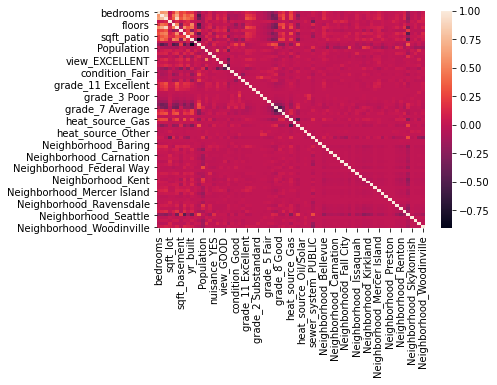

In [232]:
sns.heatmap(X.corr())

In [103]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old,Population
bedrooms,1.000000,0.593408,0.630755,0.000291,0.195625,0.537593,0.234867,0.304974,0.192084,0.182904,0.010753,-0.019399,0.133572,-0.192947,0.013681
bathrooms,0.593408,1.000000,0.779861,0.038917,0.427804,0.680873,0.260681,0.461214,0.333498,0.455823,0.042714,0.046573,0.178023,-0.484485,-0.055996
sqft_living,0.630755,0.779861,1.000000,0.118722,0.355948,0.881704,0.335856,0.503708,0.405895,0.328809,0.035455,0.046253,0.233359,-0.348895,-0.101580
sqft_lot,0.000291,0.038917,0.118722,1.000000,-0.020452,0.128513,0.002418,0.084977,0.157356,0.012632,0.007658,-0.074580,0.183201,-0.013740,-0.106876
floors,0.195625,0.427804,0.355948,-0.020452,1.000000,0.505866,-0.243438,0.179976,0.123638,0.521014,-0.015508,0.047992,0.088202,-0.531768,-0.068456
sqft_above,0.537593,0.680873,0.881704,0.128513,0.505866,1.000000,-0.073831,0.553849,0.320947,0.428496,0.007158,-0.024946,0.337772,-0.437196,-0.114727
sqft_basement,0.234867,0.260681,0.335856,0.002418,-0.243438,-0.073831,1.000000,0.017015,0.214328,-0.227452,0.052547,0.187594,-0.221703,0.207034,0.011529
sqft_garage,0.304974,0.461214,0.503708,0.084977,0.179976,0.553849,0.017015,1.000000,0.228163,0.496895,-0.104440,-0.131875,0.377277,-0.454412,0.002236
sqft_patio,0.192084,0.333498,0.405895,0.157356,0.123638,0.320947,0.214328,0.228163,1.000000,0.136048,0.057764,0.011023,0.122203,-0.155993,-0.095232
yr_built,0.182904,0.455823,0.328809,0.012632,0.521014,0.428496,-0.227452,0.496895,0.136048,1.000000,-0.237206,-0.152983,0.353998,-0.907946,-0.044433


<AxesSubplot:>

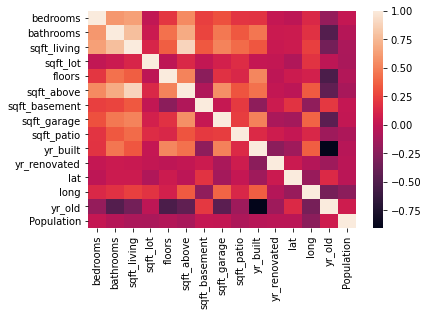

In [104]:
sns.heatmap(X.corr())

scatter plot: visualize relationship  
box plot: gives you quantile info
confidence interval 
histograms: distribution of frequencies 
qq plot residuals (outside of range) is 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f89b9e24be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89b9e33280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f89b9e24790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89b9e339a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f89b9e33cd0>],
 'means': []}

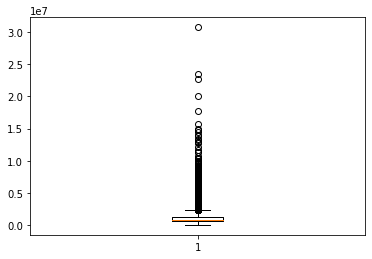

In [105]:
plt.boxplot(df1.price)

(array([2.8364e+04, 6.7600e+02, 7.9000e+01, 1.7000e+01, 1.0000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.7360000e+04, 3.0996240e+06, 6.1718880e+06, 9.2441520e+06,
        1.2316416e+07, 1.5388680e+07, 1.8460944e+07, 2.1533208e+07,
        2.4605472e+07, 2.7677736e+07, 3.0750000e+07]),
 <BarContainer object of 10 artists>)

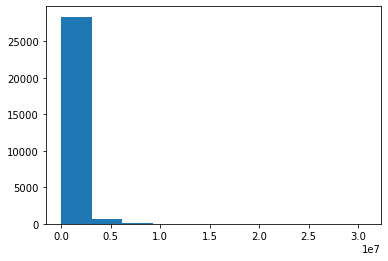

In [106]:
plt.hist(df1.price)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

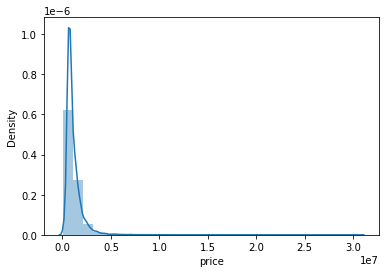

In [107]:
sns.distplot(df1.price, bins=30, kde=True)

In [108]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old,Population
count,2.915200e+04,29152.000000,29152.000000,29152.000000,2.915200e+04,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000,29152.000000
mean,1.113367e+06,3.436883,2.332739,2131.673196,1.712848e+04,1.516654,1826.396371,481.397503,336.458905,216.378979,1973.830303,93.779535,47.543349,-122.214379,98077.248148,44.784612,30470.448957
std,8.958348e+05,0.976831,0.894813,976.875996,6.084812e+04,0.548313,880.303274,586.205229,286.244187,246.792890,31.665996,422.656961,0.145970,0.143108,54.133260,30.991642,11293.348724
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,98001.000000,-1.000000,294.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.431014,-122.328445,98032.000000,18.000000,21147.000000
50%,8.690000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,141.500000,1976.000000,0.000000,47.557950,-122.234025,98059.000000,43.000000,31365.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.077125e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.672016,-122.127607,98117.000000,66.000000,39816.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98288.000000,122.000000,58442.000000


In [109]:
df1.bedrooms.value_counts()

3     12318
4      9490
2      3539
5      2767
6       493
1       371
7        80
0        38
8        37
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

In [110]:
df1_clean = df1[df1.bedrooms < 6]

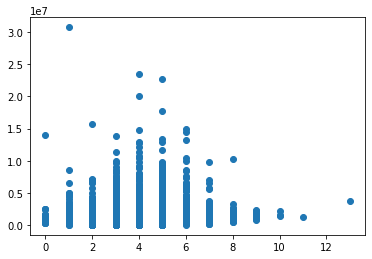

In [112]:
plt.scatter(df1.bedrooms, df1.price)

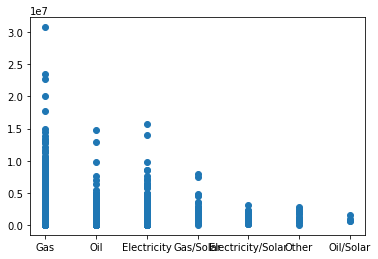

In [113]:
plt.scatter(df1.heat_source, df1.price)

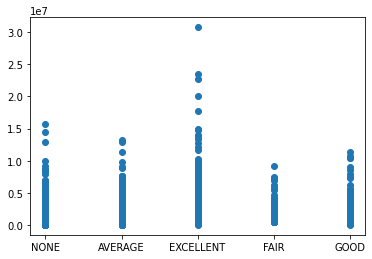

In [114]:
plt.scatter(df1.view, df1.price)

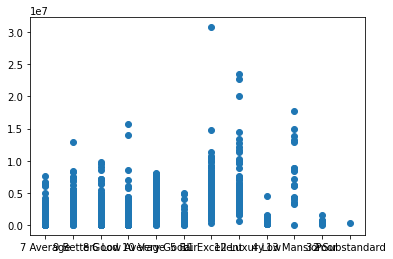

In [115]:
plt.scatter(df1.grade, df1.price)

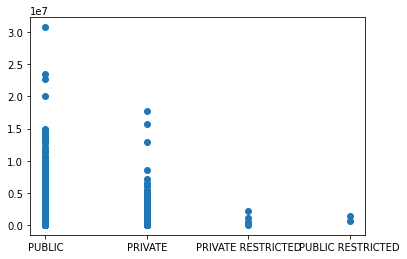

In [116]:
plt.scatter(df1.sewer_system, df1.price)

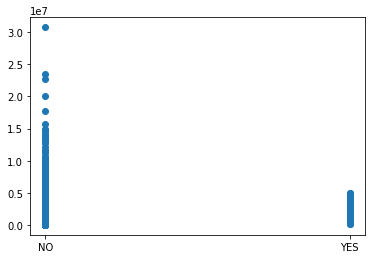

In [117]:
plt.scatter(df1.greenbelt, df1.price)

## BASELINE PROJECT

## Discrete numeric predictors 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

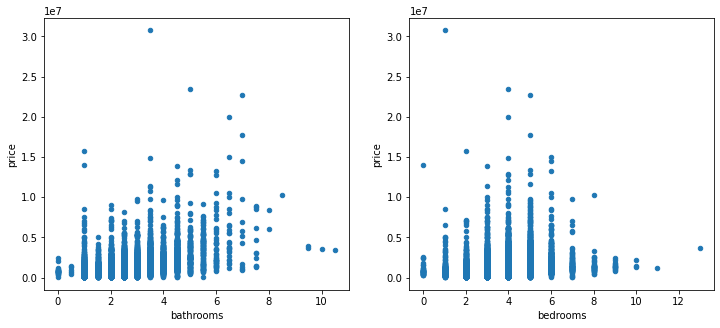

In [235]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='bathrooms', y='price', ax=ax1)
df1.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='floors', ylabel='price'>

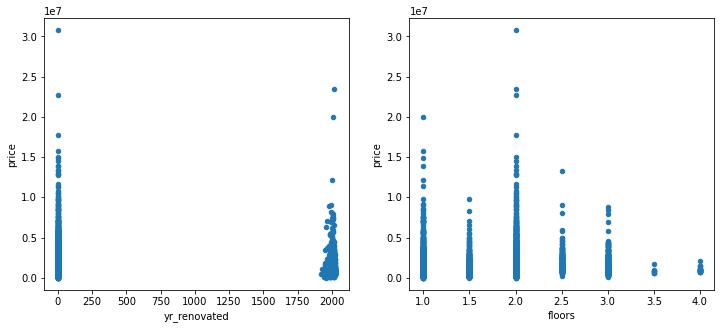

In [52]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='yr_renovated', y='price', ax=ax1)
df1.plot.scatter(x='floors', y='price', ax=ax2)

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

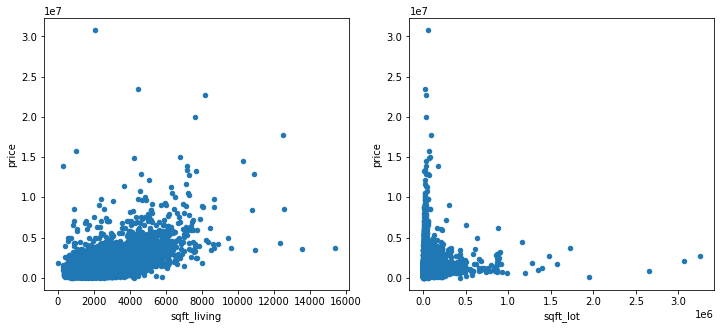

In [53]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='sqft_living', y='price', ax=ax1)
df1.plot.scatter(x='sqft_lot', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

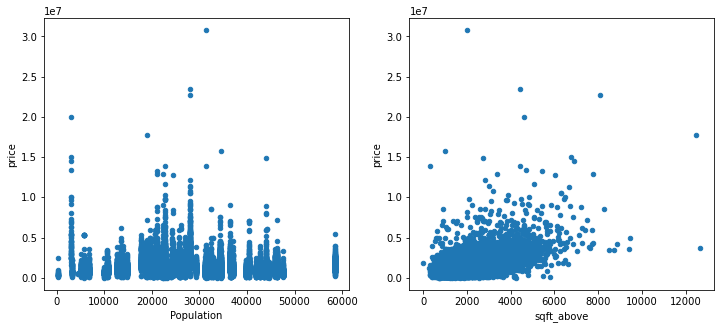

In [54]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='Population', y='price', ax=ax1)
df1.plot.scatter(x='sqft_above', y='price', ax=ax2)

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

In [73]:
y = df1['price']

In [74]:
X1 = df1[['sqft_living']]
Xbase = sm.OLS(y, sm.add_constant(X1))
results1 = Xbase.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:41:11   Log-Likelihood:            -4.3393e+05
No. Observations:               29152   AIC:                         8.679e+05
Df Residuals:                   29150   BIC:                         8.679e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.208e+04   9914.898     -9.287      

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


`sqft_living` was the attribute most strongly correlated with `price`, so we set our baseline by describing this relationship.  Overall this model is statistically significant, explaining about 38 percent of the variance in price.  

In [75]:
baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
baseline_mae

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


398942.3263465434

Overall this model is off by about $398,942. 

The intercept is extremely negative, at minus 9 to the 4th power.  The coefficient for `sqft_living` is about $565.  

This means that for each additional square foot of living space, the cost of the home increases by about $565.  

## Bathrooms

In [80]:
X2 = df1[['sqft_living','bedrooms']]
Xbase1 = sm.OLS(y, sm.add_constant(X2))
results2 = Xbase1.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     9565.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:52:12   Log-Likelihood:            -4.3355e+05
No. Observations:               29152   AIC:                         8.671e+05
Df Residuals:                   29149   BIC:                         8.671e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.206e+05   1.49e+04     14.792      

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


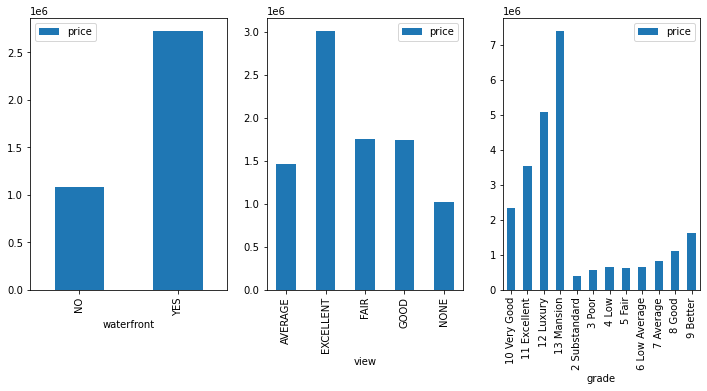

In [81]:
cats1 = ['waterfront', 'view', 'grade']
fig, axes = plt.subplots(ncols=len(cats1), figsize=(12,5))
for index, feature in enumerate(cats1):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=axes[index])


## View

In [86]:
cat = "view"
X_iter = df1[['sqft_living','bedrooms', cat]]
X_iter

,sqft_living,bedrooms,view
0,1180,4,NONE
1,2770,5,AVERAGE
2,2880,6,AVERAGE
3,2160,3,AVERAGE
4,1120,2,NONE
...,...,...,...
29163,1910,5,NONE
29164,2020,3,FAIR
29165,1620,3,NONE
29166,2570,3,NONE


In [87]:
X_iter = pd.get_dummies(X_iter, columns=[cat])
X_iter

,sqft_living,bedrooms,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,4,0,0,0,0,1
1,2770,5,1,0,0,0,0
2,2880,6,1,0,0,0,0
3,2160,3,1,0,0,0,0
4,1120,2,0,0,0,0,1
...,...,...,...,...,...,...,...
29163,1910,5,0,0,0,0,1
29164,2020,3,0,0,1,0,0
29165,1620,3,0,0,0,0,1
29166,2570,3,0,0,0,0,1


In [88]:
X_iter.drop('view_NONE', axis=1, inplace=True)
X_iter

,sqft_living,bedrooms,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,1180,4,0,0,0,0
1,2770,5,1,0,0,0
2,2880,6,1,0,0,0
3,2160,3,1,0,0,0
4,1120,2,0,0,0,0
...,...,...,...,...,...,...
29163,1910,5,0,0,0,0
29164,2020,3,0,0,1,0
29165,1620,3,0,0,0,0
29166,2570,3,0,0,0,0


In [89]:
iter_model = sm.OLS(y, sm.add_constant(X_iter))
iter_results = iter_model.fit()
print(iter_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     3781.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:55:20   Log-Likelihood:            -4.3252e+05
No. Observations:               29152   AIC:                         8.650e+05
Df Residuals:                   29145   BIC:                         8.651e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.942e+05   1.44e+04     13.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
iter_mae

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


385771.61647006357

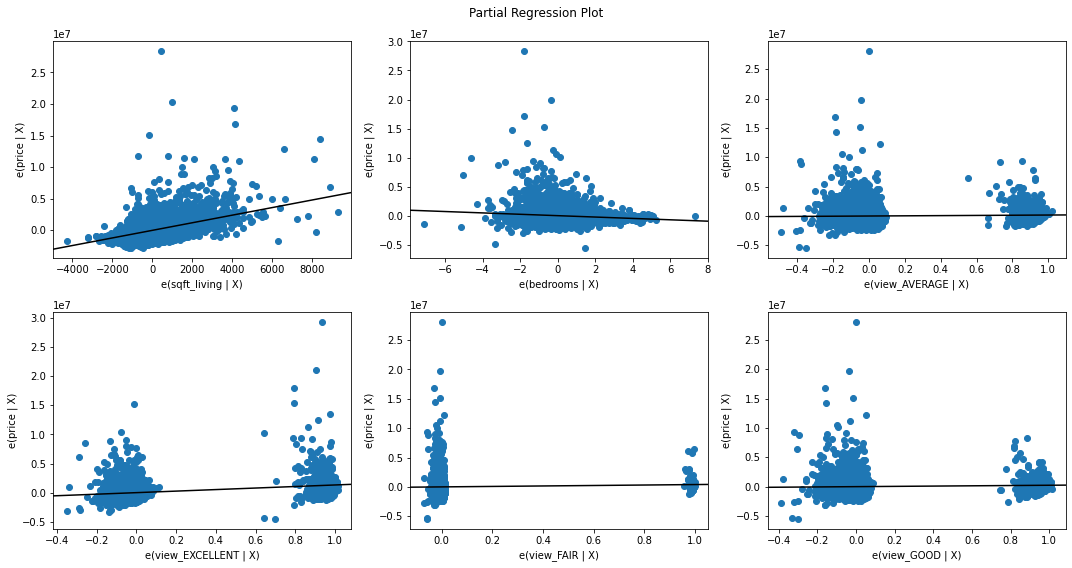

In [91]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    iter_results, 
    exog_idx=list(X_iter.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

# Neighborhood

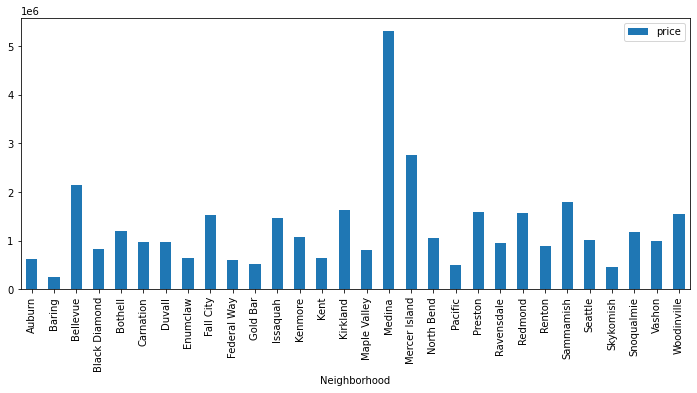

In [65]:
Neigh = ['Neighborhood']
fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
for index, feature in enumerate(Neigh):
    df1.groupby(feature).mean().plot.bar(
        y='price', ax=ax)


In [92]:
cat1 = "Neighborhood"
X_iter = df1[['sqft_living', 'bedrooms', cat1]]
X_iter

,sqft_living,bedrooms,Neighborhood
0,1180,4,Renton
1,2770,5,Seattle
2,2880,6,Seattle
3,2160,3,Seattle
4,1120,2,Issaquah
...,...,...,...
29163,1910,5,Seattle
29164,2020,3,Seattle
29165,1620,3,Seattle
29166,2570,3,Renton


In [93]:
X_iter = pd.get_dummies(X_iter, columns=[cat1])
X_iter

,sqft_living,bedrooms,Neighborhood_Auburn,Neighborhood_Baring,Neighborhood_Bellevue,Neighborhood_Black Diamond,Neighborhood_Bothell,Neighborhood_Carnation,Neighborhood_Duvall,Neighborhood_Enumclaw,...,Neighborhood_Preston,Neighborhood_Ravensdale,Neighborhood_Redmond,Neighborhood_Renton,Neighborhood_Sammamish,Neighborhood_Seattle,Neighborhood_Skykomish,Neighborhood_Snoqualmie,Neighborhood_Vashon,Neighborhood_Woodinville
0,1180,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2770,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2880,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2160,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1120,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,1910,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29164,2020,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29165,1620,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29166,2570,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
X_iter.drop('Neighborhood_Seattle', axis=1, inplace=True)

In [95]:
X_iter

,sqft_living,bedrooms,Neighborhood_Auburn,Neighborhood_Baring,Neighborhood_Bellevue,Neighborhood_Black Diamond,Neighborhood_Bothell,Neighborhood_Carnation,Neighborhood_Duvall,Neighborhood_Enumclaw,...,Neighborhood_Pacific,Neighborhood_Preston,Neighborhood_Ravensdale,Neighborhood_Redmond,Neighborhood_Renton,Neighborhood_Sammamish,Neighborhood_Skykomish,Neighborhood_Snoqualmie,Neighborhood_Vashon,Neighborhood_Woodinville
0,1180,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2770,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2880,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2160,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1120,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,1910,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29164,2020,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29165,1620,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29166,2570,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
iter_model = sm.OLS(y, sm.add_constant(X_iter))
iter_results = iter_model.fit()
print(iter_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1119.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:56:16   Log-Likelihood:            -4.2947e+05
No. Observations:               29152   AIC:                         8.590e+05
Df Residuals:                   29120   BIC:                         8.593e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
iter_mae

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


314246.8171421147

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
fig = plt.figure(figsize=(30,220))
sm.graphics.plot_partregress_grid(
    iter_results, 
    exog_idx=list(X_iter.columns),
    grid=(14,15),
    fig=fig)
plt.tight_layout()
plt.show()

ccpr function partial 

### Final Model

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion